# Programming Exercise 2: Logistic Regression
In this exercise, you will implement logistic regression and apply it to two
different datasets.

In [1]:
# Scientific and vector computation for Python
import numpy as np

# Plotting library
import matplotlib.pyplot as plt

# Optimization module in scipy
from scipy import optimize

# tells matplotlib to embed plots within the notebook
%matplotlib inline

## 1 Logistic Regression
In this part of the exercise, you will build a logistic regression model to
predict whether a student gets admitted into a university.

Suppose that you are the administrator of a university department and you want
to determine each applicant's chance of admission based on their results on two
exams. You have historical data from previous applications that you can use as
a training set for logistic regression. For each training example, you have the
applicant's scores on two exams and the admissions decision.

Your task is to build a classification model that estimates an applicant's
probability of admission based on the scores from those two exams.

The following cell will load the data and corresponding labels:

In [2]:
# Load data. The first two columns contains the exam scores and the third
# column contains the label
data = np.loadtxt('ex2data1.txt', dtype=float, delimiter=',')
X, y = data[:, 0:2], data[:, 2]

### 1.1 Visualizing the data
Before starting to implement any learning algorithm, it is always good to
visualize the data if possible. You will now complete the code in function
`plotData` so that it displays a figure, in which the axes are the two
exam scores, and the positive and negative examples are shown with different
markers.

In [3]:
def plotData(X, y, label1='', label0='', xlabel='', ylabel=''):
    """
    Plots the data points X and y into a new figure.

    Parameters
    ----------
    X : array_like
        An (m, 2) matrix representing the dataset.

    y : array_like
        Label values for the dataset. A vector of size (m, ).
    """
    y0, y1 = y == 0, y == 1
    # plt.scatter(X[y1, 0], X[y1, 1], marker='+', color='g', label=label1)
    plt.plot(X[y1, 0], X[y1, 1], 'g+', ms=10, mew=2, label=label1)
    plt.plot(X[y0, 0], X[y0, 1], 'rx', ms=8, mew=2, label=label0)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(loc='upper right')

Now, we call the function to display the loaded data:

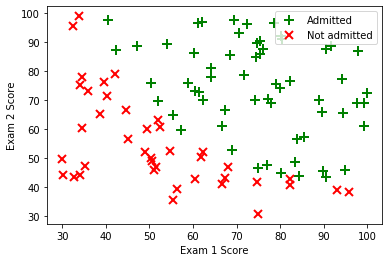

In [4]:
# plotting
plotData(X, y, label1='Admitted', label0='Not admitted',
         xlabel='Exam 1 Score', ylabel='Exam 2 Score')
# plt.legend(['Admitted', 'Not admitted'], loc='upper right')
# plt.xlabel('Exam 1 Score')
# plt.ylabel('Exam 2 Score')

### 1.2 Implementation
#### 1.2.1 Warmup exercise: sigmoid function
Before you start with the actual cost function, recall that the logistic
regression hypothesis is defined as:

\begin{equation}
h_{\theta}(x) = g(\theta^Tx),
\end{equation}

where function $g$ is the sigmoid function. The sigmoid function is defined as:

\begin{equation}
g(z) = \frac{1}{1 + e^{-z}}.
\end{equation}

Your first step is to implement this function `sigmoid` so it can be called by
the rest of your program. When you are finished, try testing a few values by
calling `sigmoid(x)` in a new cell. For large positive values of $x$, the
sigmoid should be close to 1, while for large negative values, the sigmoid
should be close to 0. Evaluating `sigmoid(0)` should give you exactly 0.5.
Your code should also work with vectors and matrices. **For a matrix, your
function should perform the sigmoid function on every element.**

In [5]:
def sigmoid(z):
    """
    Compute sigmoid function given the input z.

    Parameters
    ----------
    z : array_like
        The input to the sigmoid function. This can be a 1-D vector
        or a 2-D matrix.

    Returns
    -------
    g : array_like
        The computed sigmoid function. g has the same shape as z, since
        the sigmoid is computed element-wise on z.
    """
    g = 1 / (1 + np.exp(-z))

    return g

The following cell evaluates the sigmoid function at $z = 0$. You should get a
value of 0.5. You can also try different values for $z$ to experiment with the
sigmoid function.

In [6]:
# Test the sigmoid functino
z = 0
g = sigmoid(z)
print('g(%d) = %.2f' %(z, g))

g(0) = 0.50


#### 1.2.2 Cost function and gradient
Now you will implement the cost function and gradient for logistic regression.
Before proceeding we add the intercept to $X$.

In [7]:
# Setup the data matrix appropriately, and add ones for the intercept term
[m, n] = X.shape
X = np.c_[np.ones([m, 1]), X]
initial_theta = np.zeros(n + 1)

Now complete the code for function `costFunction` to return the cost and
gradient. Recall that the cost function in logistic regression is

\begin{equation}
J(\theta) = \frac{1}{m} \sum_{i=1}^m
\left[
-y^{(i)} \log(h_{\theta}(x^{(i)})) - (1 - y^{(i)})\log(1 - h_{\theta}(x^{(i)}))
\right],
\end{equation}

and the gradient of the cost is a vector of the same length as $\theta$ where
the $j^{\text{th}}$ element (for $j = 0, 1, \dots, n$) is defined as follows:

\begin{equation}
\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^m
\left( h_\theta(x^{(i)}) - y^{(i)} \right)x_j^{(i)}
\end{equation}

Note that while this gradient looks identical to the linear regression gredient,
the formula is actually different because linear and logistic regression have
different definitions of $h_\theta(x)$.

In [8]:
def costFunction(theta, X, y):
    """
    Compute cost and gradient for logistic regression

    Parameters
    ----------
    theta : array_like
        The parameters for logistic regression. This a vector of shape (n+1, ).
    X : array_like
        The input dataset of shape (m, n+1) where m is the total number of data
        points and n is the number of features. We assume the intercept has
        already been added to the input.
    y : arra_like
        Labels for the input. This is a vector of shape (m, ).

    Returns
    -------
    cost : float
        The computed value for the cost function.
    grad : array_like
        A vector of shape (n+1, ) which is the gradient of the cost
        function with respect to theta, at the current values of theta.
    """
    m = y.size  # number of training examples
    h = sigmoid(np.dot(X, theta))
    cost = - np.sum(y * np.log(h) + (1 - y) * np.log(1 - h)) / m
    grad = np.dot(h - y, X) / m
    return cost, grad

Once you are done, the next cell will call your `costFunction` using the initial
parameters of $\theta$. You should see that the cost is about 0.693.

In [9]:
# Compute and display initial cost and gradient
cost, grad = costFunction(initial_theta, X, y)

print('\nCost at initial theta (zeros): {:.3f}'.format(cost))
print('Expected cost (approx): 0.693')
print('Gradient at initial theta:   [{:.4f}, {:.4f}, {:.4f}]'.format(*grad))
print('Expected gradients (approx): [-0.1000, -12.0092, -11.2628]')

# Compute and display cost and gradient with non-zero theta
test_theta = np.array([-24, 0.2, 0.2])
cost, grad = costFunction(test_theta, X, y)

print('\nCost at test theta: {:.3f}'.format(cost))
print('Expected cost (approx): 0.218')
print('Gradient at test theta:      [{:.4f}, {:.4f}, {:.4f}]'.format(*grad))
print('Expected gradients (approx): [0.043 , 2.5662, 2.647 ]')


Cost at initial theta (zeros): 0.693
Expected cost (approx): 0.693
Gradient at initial theta:   [-0.1000, -12.0092, -11.2628]
Expected gradients (approx): [-0.1000, -12.0092, -11.2628]

Cost at test theta: 0.218
Expected cost (approx): 0.218
Gradient at test theta:      [0.0429, 2.5662, 2.6468]
Expected gradients (approx): [0.043 , 2.5662, 2.647 ]


#### 1.2.3 Learning parameters using `scipy.optimize`
In the previous assignment,  you found the optimal parameters of a linear
regression model by implementing gradient descent. You wrote a cost function
and calculated its gradient, then took a gradient desccent step accordingly.
This time, instead of taking gradient descent steps, you will use the `scipy.
optimize` module. `SciPy` is a numerical computing library for Python. It
provides an optimization module for root finding and minimization. As of
`sicpy 1.0`, the function `scipy.optimize.minimize` is the method to use for
optimization problems (both constrained adn unconstrained).

For logistic regression, you want to optimize the cost function $J(\theta)$
with parameters $\theta$. Concretely, you are going to use `optimize.minimize`
to find the best parameters for the logistic regression cost function, given
a fixed dataset $X$ and $y$ values). You will pass to `optimize.minimize` the
following inputs:

- `costFunction`: A cost function that, when given the training set and a
particular $\theta$, computes the logistic regression cost and gradient with
respect to $\theta$ for the dataset $(X, y)$. It is important to note that we
only pass the name of the function without the parameters. This indicates that
we are only providing a reference to this function, and not evaluating the
result from this function.
- `initial_theta`: The initial values of the parameters we are trying to optimize.
- `(X, y)`: These are additional arguments to the cost function.
- `jac`: Indication if the cost function returns the Jacobian (gradient) along
with cost value.
- `method`: Optimization method/algorithm to use.
- `options`: Additional options which might be specific to the specific method.
In the following, we only tell the algorithm the maximum number of iterations
before it terminates.

If you have completed the `costFunction` correctly, `optimize.minimize` will
converge on the right optimization parameters and return the final values of
the cost and $\theta$ in a class object. Notice that by using `optimize.
minimize`, you did not have to write any loops yourself, or set a learning
rate like you did for gradient descent. This is all done by `optimize.
minimize`. You only needed to provide a function calculating the cost and the
gradient.

In the following, we already have code written to call `optimize.minimize` with
the correct arguments.

In [10]:
# Set options for optimize.minize
options = {'maxiter': 400}

res = optimize.minimize(costFunction, initial_theta, (X, y), jac=True,
                        method='TNC', options=options)

# The fun property of `OptimizeResult` object returns the value of costFunction
# at optimized theta
cost = res.fun

# The optimized theta is in the x property
theta = res.x

# Print theta to screen
print('Cost at theta found by `optimize.minimize`: {:.3f}'.format(cost))
print('Expected cost (approx): 0.203\n')

print('The optimized theta:     [{:.3f}, {:.3f}, {:.3f}]'.format(*theta))
print('Expected theta (approx): [-25.161, 0.206, 0.201]')

Cost at theta found by `optimize.minimize`: 0.203
Expected cost (approx): 0.203

The optimized theta:     [-25.161, 0.206, 0.201]
Expected theta (approx): [-25.161, 0.206, 0.201]


Once `optimize.minimize` completes, we want to use the final value of $\theta$
to visualize the decision boundary on the training data.

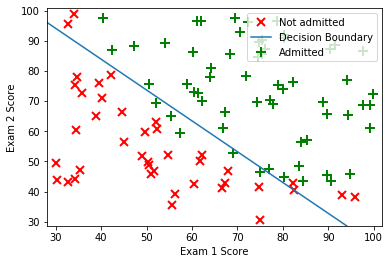

In [11]:
plotData(X[:, 1:3], y, label1='Admitted', label0='Not admitted',
         xlabel='Exam 1 Score', ylabel='Exam 2 Score')

# Plotting the decision boundary
x1 = np.arange(min(X[:, 1]) - 2, max(X[:, 1]) + 2)
x2 = (-theta[0] - theta[1] * x1) / theta[2]
plt.plot(x1, x2, label='Decision Boundary')
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend([handles[i] for i in [1, 2, 0]], [labels[i] for i in [1, 2, 0]],
           loc='upper right')
plt.axis([min(X[:, 1]) - 2, max(X[:, 1]) + 2,
          min(X[:, 2]) - 2, max(X[:, 2]) + 2]);

#### 1.2.4 Evaluating logistic regression
After learning the parameters, you can use the model to predict whether a
particular student will be admitted. For a student with an Exam 1 score of 45
and an Exam 2 score of 85, you should expect to see an admission probability
of 0.776. Another way to evaluate the quality of the parameters we have found
is to see how well the learned model predicts on our training set.

In this part, your task is to complete the code in function `predict`. This
function will produce "1" or "0" predictions given a dataset and a learned
parameter vector $\theta$.

In [12]:
def predict(theta, X):
    """
    Predict whether the label is 0 or 1 using learned logistic regression.
    Computes the predictions for X using a threshold at 0.5
    (i.e., if sigmoid(X*theta) >= 0.5, predict 1)

    Parameters
    ----------
    theta : array_like
        Parameters for logistic regression. A vector of shape (n+1, ).

    X : array_like
        The data to use for computing predictions. The rows is the number of
        points to compute predictions, and columns is the number of features.

    Returns
    -------
    p : array_like
        Predictions and 0 or 1 for each row in X.
    """
    p = np.round(sigmoid(np.dot(X, theta)))

    return p

After you have completed the code in `predict`, we proceed to report the
training accuracy of your classifier by computing the percentage of examples
it got correct.

In [13]:
# Predict probability for a student with score 45 on Exam 1 and score 85 on Exam 2
prob = sigmoid(np.dot([1, 45, 85], theta))
print('For a student with scores 45 and 85,\n'
      'we predict an admission probability of {:.3f}'.format(prob))
print('Expected value: 0.775 ± 0.002\n')

# Compute accuracy on our training set
p = predict(theta, X)
print('Train accuracy: {:.2f}%'.format(np.mean(p == y) * 100))
print('Expected accuracy (approx): 89.00%')

For a student with scores 45 and 85,
we predict an admission probability of 0.776
Expected value: 0.775 ± 0.002

Train accuracy: 89.00%
Expected accuracy (approx): 89.00%


## 2 Regularized logistic regression
In this part of the exercise, you will implement regularized logistic
regression to predict whether microchips from a fabrication plant passes
quality assurance (QA). During QA, each microchip goes through various tests
to ensure it is functioning correctly. Suppose you are the product manager of
the factory and you have the test results for some microchips on two different
tests, you would like to determine whether the microchips should be accepted or
rejected. To help you make the decision, you have a dataset of test results on
past microchips, from which you can build a logistic regression model.

First, we load the data from a CSV file:

In [14]:
# Load Data
# The first two columns contains the exam scores and the third column contains the label
data = np.loadtxt('ex2data2.txt', dtype=float, delimiter=',')
X, y = data[:, 0:2], data[:, 2]

### 2.1 Visualize the data
Similar to the previous parts of the exercise, `plotData` is used to generate
a figure.

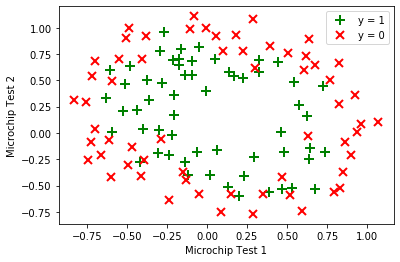

In [15]:
plotData(X, y, label1='y = 1', label0='y = 0',
         xlabel='Microchip Test 1', ylabel='Microchip Test 2')

The above figure shows that our dataset cannot be separated into positive and
negative examples by a straight-line through the plot. Therefore, a
straight-forward application of logistic regression will not perform well on
this dataset since logistic regression will only be able to find a linear
decision boundary.

### 2.2 Feature mapping
One way to fit the data better is to create more features from each data point.
In the provided function `matFeature`, we will map the features into all
polynomial terms of $x_1$ and $x_2$ up to the sixth power.

\begin{equation}\text{mapFeature}(x) =
\begin{bmatrix}1 & x_1 & x_2 & x_1^2 & x_1x_2 & x_2^2 & x_1^3 & \cdots & x_1x_2^5 & x_2^6\end{bmatrix}^T
\end{equation}

As a result of this mapping, our vector of two features (the scores on two QA
tests) has been transformed into a 28-dimensional vector. A logistic regression
classifier trained on this higher-dimensional feature vector will have a more
complex decision boundary and will appear nonlinear when drawn in our
2-dimensional plot. While the feature mapping allows us to build a more
expressive classifier, it also more susceptible to overfitting. In the next
parts of the exercise, you will implement regularized logistic regression to
fit the data and also see for yourself how regularization can help combat the
overfitting problem.

In [16]:
def mapFeature(X1, X2, degree=6):
    """
    Maps the two input features to quadratic features used in the regularization
    exercise. Returns a new feature array with more features, comprising of
    X1, X2, X1.^2, X2.^2, X1*X2, X1*X2.^2, etc..

    Parameters
    ----------
    X1 : array_like
        A vector of shape (m, 1), containing one feature for all examples.
    X2 : array_like
        A vector of shape (m, 1), containing a second feature for all examples.
        (Inputs X1, X2 must be the same size).
    degree: int, optional
        The polynomial degree.

    Returns
    -------
    X : array_like
        A matrix of of m rows, and columns depend on the degree of polynomial.
    """
    X = np.ones(X1.shape[0])
    for i in np.arange(1, degree + 1, 1):
        for j in range(i + 1):
            X = np.c_[X, X1**(i - j) * X2**j]
    return X

X_map = mapFeature(X[:, 0], X[:, 1])

### 2.3 Cost function and gradient
Now you will implement code to compute the cost function and gradient for
regularized logistic regression. Complete the code for the function
`costFunctionReg` to return the cost and gradient.

Recall that the regularized cost function in logistic regression is

\begin{equation}
J(\theta) = \frac{1}{m}\sum_{i=1}^m
\left[ -y^{(i)} \log\left(h_{\theta}(x^{(i)})\right)
 - (1 - y^{(i)})\log\left(1 - h_{\theta}(x^{(i)})\right) \right]
+ \frac{\lambda}{2m} \sum_{j=1}^n \theta^2_j .
\end{equation}

Note that you should not regularize the parameters $\theta_0$. The gradient of
the cost function is a vector where the $j^{\text{th}}$ element is defined as
follows:

\begin{aligned}
&\frac{\partial J(\theta)}{\partial \theta_0} = \frac{1}{m} \sum_{i=1}^m
\left( h_\theta(x^{(i)}) - y^{(i)} \right)x_j^{(i)} & \text{for $j = 1$} \\
&\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^m
\left( h_\theta(x^{(i)}) - y^{(i)} \right)x_j^{(i)} +
\frac{\lambda}{m} \theta_j & \text{for $j \geq 1$}
\end{aligned}

In [17]:
def costFunctionReg(theta, X, y, lam):
    """
    Compute cost and gradient for logistic regression with regularization.

    Parameters
    ----------
    theta : array_like
        Logistic regression parameters. A vector with shape (n, ). n is
        the number of features including any intercept. If we have mapped
        our initial features into polynomial features, then n is the total
        number of polynomial features.

    X : array_like
        The data set with shape (m, n). m is the number of examples, and
        n is the number of features (after feature mapping).

    y : array_like
        The data labels. A vector with shape (m, ).

    lam : float
        The regularization parameter.

    Returns
    -------
    cost : float
        The computed value for the regularized cost function.

    grad : array_like
        A vector of shape (n, ) which is the gradient of the cost
        function with respect to theta, at the current values of theta.
    """
    m = y.size  # number of training examples
    h = sigmoid(np.dot(X, theta))

    cost1 = - np.sum(y * np.log(h) + (1 - y) * np.log(1 - h)) / m
    cost2 = 0.5 * lam * np.dot(theta[1:].T, theta[1:]) / m  # Don't penalize theta_0
    cost = cost1 + cost2

    grad = np.dot(h - y, X) / m
    grad[1:] += (lam * theta / m)[1:]

    return cost, grad

Once you are done with the `costFunctionReg`, we call it below using the initial
value of $\theta$ (initialized to all zeros), and also another test case where
$\theta$ is all ones.

In [18]:
# Initialize fitting parameters
initial_theta = np.zeros(X_map.shape[1])

# Set regularization parameter lambda to 1
lam = 1

# Compute and display initial cost and gradient for regularized logistic regression
cost, grad = costFunctionReg(initial_theta, X_map, y, lam)

print('Cost at initial theta (zeros): {:.3f}'.format(cost))
print('Expected cost (approx)       : 0.693\n')
print('Gradient at initial theta (zeros) - first five values only:')
print('[ {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f} ]'.format(*grad[:5]))
print('Expected gradients (approx) - first five values only:')
print('[ 0.0085, 0.0188, 0.0001, 0.0503, 0.0115 ]\n')

# Compute and display cost and gradient with all-ones theta and lambda = 10
test_theta = np.ones(X_map.shape[1])
cost, grad = costFunctionReg(test_theta, X_map, y, lam=10)

print('Cost at test theta     : {:.2f}'.format(cost))
print('Expected cost (approx) : 3.16\n')
print('Gradient at test theta - first five values only:')
print('[ {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f} ]'.format(*grad[:5]))
print('Expected gradients (approx) - first five values only:')
print('[ 0.3460, 0.1614, 0.1948, 0.2269, 0.0922 ]\n')

Cost at initial theta (zeros): 0.693
Expected cost (approx)       : 0.693

Gradient at initial theta (zeros) - first five values only:
[ 0.0085, 0.0188, 0.0001, 0.0503, 0.0115 ]
Expected gradients (approx) - first five values only:
[ 0.0085, 0.0188, 0.0001, 0.0503, 0.0115 ]

Cost at test theta     : 3.16
Expected cost (approx) : 3.16

Gradient at test theta - first five values only:
[ 0.3460, 0.1614, 0.1948, 0.2269, 0.0922 ]
Expected gradients (approx) - first five values only:
[ 0.3460, 0.1614, 0.1948, 0.2269, 0.0922 ]



#### 2.3.1 Learning parameters using `scipy.optimize.minimize`
Similar to the previous parts, you will use `optimize.minimize` to learn the
optimal parameters $\theta$. If you have completed the cost and gradient for
regularized logistic regression (`costFunctionReg`) correctly, you should be
able to step through the next part to learn the parameters $\theta$ using
`optimize.minimize`.

### 2.4 Plotting the decision boundary
You should plot the non-linear decision boundary that separates the positive
and negative examples by computing the classifier's predictions on an evenly
space grid and then draw a contour plot where the predictions change from
"y = 0" to "y = 1".

### 2.5 Optional exercise
In this part of the exercise, you will get to try out different regularization
parameters for the dataset to understand how regularization prevents
overfitting. Notice the changes in the decision boundary as you vary $\lambda$.
With a small $\lambda$, you should find that the classifier gets almost every
training example correct, but draws a very complicated boundary, thus
overfitting the data.

Train accuracy: 83.1%
Expected accuracy (with lambda = 1.0): 83.1%


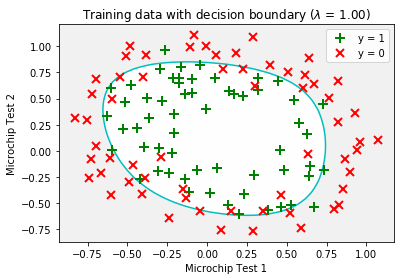

In [19]:
# Set options for optimize.minimize
options = {'maxiter': 100}

res = optimize.minimize(costFunctionReg, initial_theta, # initial_theta: zeros
                        (X_map, y, lam),                # lam = 1
                        jac=True, method='TNC', options=options)

# the fun property of OptimizeResult object returns the value of
# costFunctionReg at optimized theta
cost = res.fun

# the optimized theta is in the x property of the result
theta = res.x

plotData(X, y, label1='y = 1', label0='y = 0',
         xlabel='Microchip Test 1', ylabel='Microchip Test 2')

u = np.linspace(min(X_map[:, 1]) - 0.1, max(X_map[:, 1]) + 0.1, 50)
v = np.linspace(min(X_map[:, 2]) - 0.1, max(X_map[:, 2]) + 0.1, 50)
z = np.zeros([u.size, v.size])

# evaluate z = theta * x over the grid
for i, ui in enumerate(u):
    for j, vj in enumerate(v):
        z[i, j] = np.dot(mapFeature(np.array([ui]), np.array([vj])), theta)

plt.contour(u, v, z.T, levels=[0], colors='c')
plt.contourf(u, v, z.T, levels=[np.min(z), 0, np.max(z)],
             cmap='gray', alpha=0.1)
plt.title(r'Training data with decision boundary ($\lambda$ = %.2f)' % lam)

# Compute accuracy on training set
p = predict(theta, X_map)
print('Train accuracy: {:.1f}%'.format(np.mean(p == y) * 100))
print('Expected accuracy (with lambda = {:.1f}): 83.1%'.format(lam))
